# Clasificación Iris Dataset con ANN

En este notebook entrenaremos un red neuronal para establecer un modelo de clasificación de las especies de Iris.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importamos el dataset de ejemplo

In [2]:
from sklearn.datasets import load_iris

In [3]:
bunch = load_iris()

In [4]:
df = pd.DataFrame(bunch.data, columns=bunch.feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Formulamos el Modelo


In [6]:
X = df
y = bunch.target

#### Preprocesamiento de los datos

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)
y_dum = pd.get_dummies(y_enc).values

#### Validación cruzada

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y_dum, test_size=0.2, random_state=101)

#### Importación librerías ANN

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

#### Diseño arquitectura ANN

Cree una red con la siguiente arquitectura:
- Input vector (4 nodos) activacion 'tanh'
- Hidden Layer 1 (10 nodos) activacion 'tanh'
- Hidden Layer 2 (8 nodos) activacion 'tanh'
- Hidden Layer 3 (6 nodos) activacion 'softmax'

Utilice optimizador Adam con learning rate de 0.02

In [12]:
input_dim = X_train.shape[1]
n_classes = y_train.shape[1]

model = Sequential()
model.add(Dense(4, activation='tanh', input_shape=(input_dim,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(n_classes, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
optimizer = Adam(learning_rate=0.02)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185 (740.00 B)

 Trainable params: 185 (740.00 B)

 Non-trainable params: 0 (0.00 B)

#### Entrenamiento ANN

In [14]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.5149 - loss: 1.0598 - val_accuracy: 0.3750 - val_loss: 1.0060
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6973 - loss: 0.8011 - val_accuracy: 0.5833 - val_loss: 0.7471
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7329 - loss: 0.5852 - val_accuracy: 0.6250 - val_loss: 0.5679
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8507 - loss: 0.3766 - val_accuracy: 0.8333 - val_loss: 0.4109
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9271 - loss: 0.2792 - val_accuracy: 0.9167 - val_loss: 0.3276
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9597 - loss: 0.2062 - val_accuracy: 0.7917 - val_loss: 0.4232
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8707 - loss: 0.2527 - val_accuracy: 0.9167 - val_loss: 0.2661
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9713 - loss: 0.1240 - val_accuracy: 0.9167 - val_loss

#### Predicciones con el modelo ANN

In [15]:
# Probabilidades predichas para cada clase
y_pred_proba = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [16]:
# Convertimos a etiquetas (clase)
y_pred_class = np.argmax(y_pred_proba, axis=1)
y_test_class = np.argmax(y_test, axis=1)

In [17]:
# Volvemos a nombres de especies usando el encoder
y_pred_species = encoder.inverse_transform(y_pred_class)
y_test_species = encoder.inverse_transform(y_test_class)

In [18]:
# Tabla comparativa entre especie real y predicha
pred_df = pd.DataFrame({
    'real': y_test_species,
    'pred': y_pred_species
})
pred_df.head(10)

,real,pred
0,0,0
1,0,0
2,0,0
3,2,2
4,1,1
5,2,2
6,1,2
7,1,1
8,2,2
9,0,0


#### Métricas de Evaluación

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [20]:
cm = confusion_matrix(y_test_class, y_pred_class)
print("Matriz de confusión:\n", cm)

print("\nReporte de clasificación:\n")
print(classification_report(y_test_class, y_pred_class))

acc = accuracy_score(y_test_class, y_pred_class)
print("\nAccuracy:", acc)

Matriz de confusión:
 [[10  0  0]
 [ 0 11  1]
 [ 0  0  8]]

Reporte de clasificación:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        12
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Accuracy: 0.9666666666666667


### Graficar error error vs epochs (train y test)

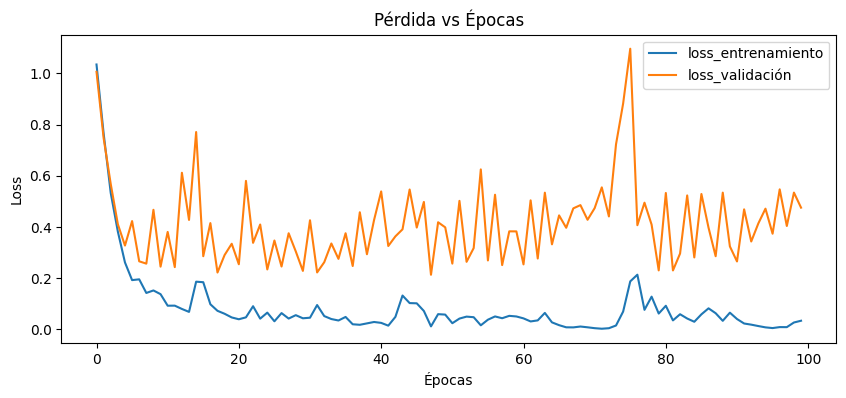

In [21]:
# Gráfico de pérdida (loss) vs épocas
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='loss_entrenamiento')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='loss_validación')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Pérdida vs Épocas')
plt.legend()
plt.show()

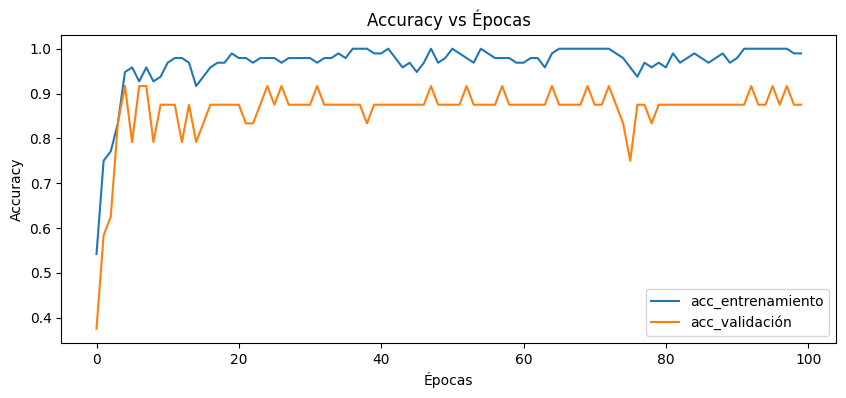

In [22]:
# Gráfico de accuracy vs épocas
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='acc_entrenamiento')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='acc_validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Épocas')
plt.legend()
plt.show()